In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath('./../../'), 'data/TS_data/')
LOCAL_DATA_PATH

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/TS_data/'

## Example 1

In [4]:
#Read the data 
df1 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv')

In [5]:
#Check data types
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

Year-Month column is not seen as a date object

In [6]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df1 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv', parse_dates = ['Year-Month'])

/var/folders/kd/yddgdhm92qxgkw2js4t89ksr0000gn/T/ipykernel_49135/1882588790.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv', parse_dates = ['Year-Month'])


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  144 non-null    datetime64[ns]
 1   Pax         144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

Now the time series reference is appropriately identified.

In [10]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

/var/folders/kd/yddgdhm92qxgkw2js4t89ksr0000gn/T/ipykernel_49135/2460517914.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')


In [11]:
df1.dtypes

Pax    int64
dtype: object

In [12]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
#We can conveniently do slicing i.e. obtain data for a specific time period.
df1['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [14]:
#We can check values corresponding to a specific time point
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

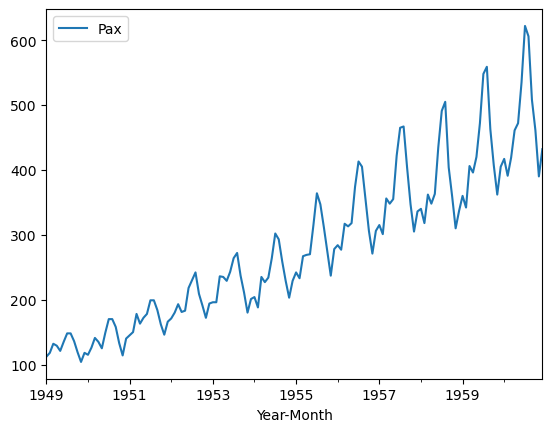

In [15]:
#Plot the time series
df1.plot()
plt.show()

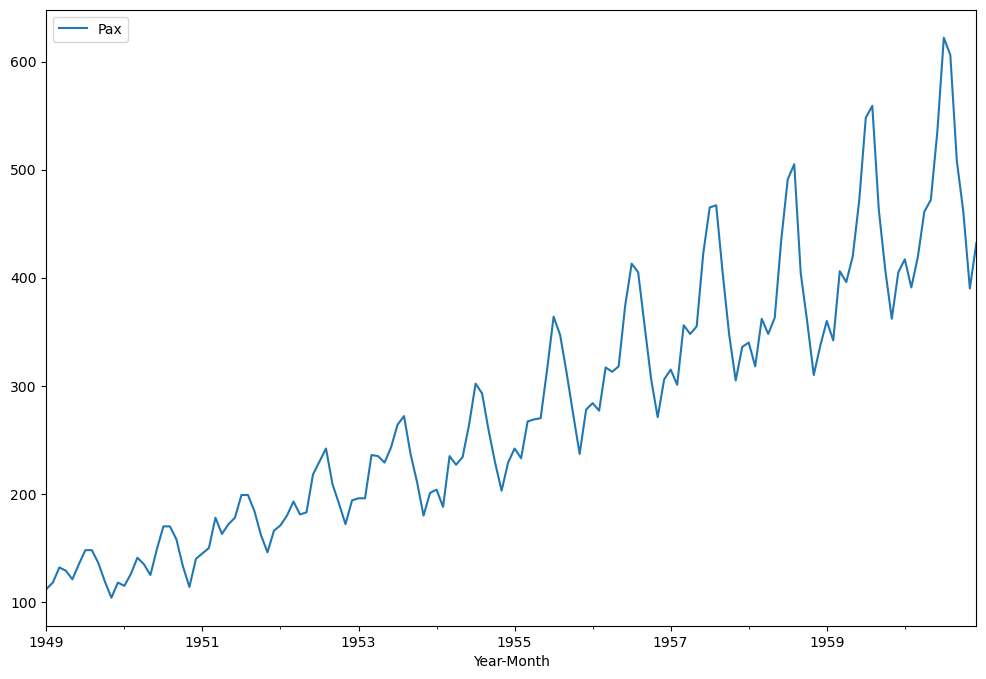

In [16]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

We see an increasing trend and seasonality which is not constant in nature.

In [17]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

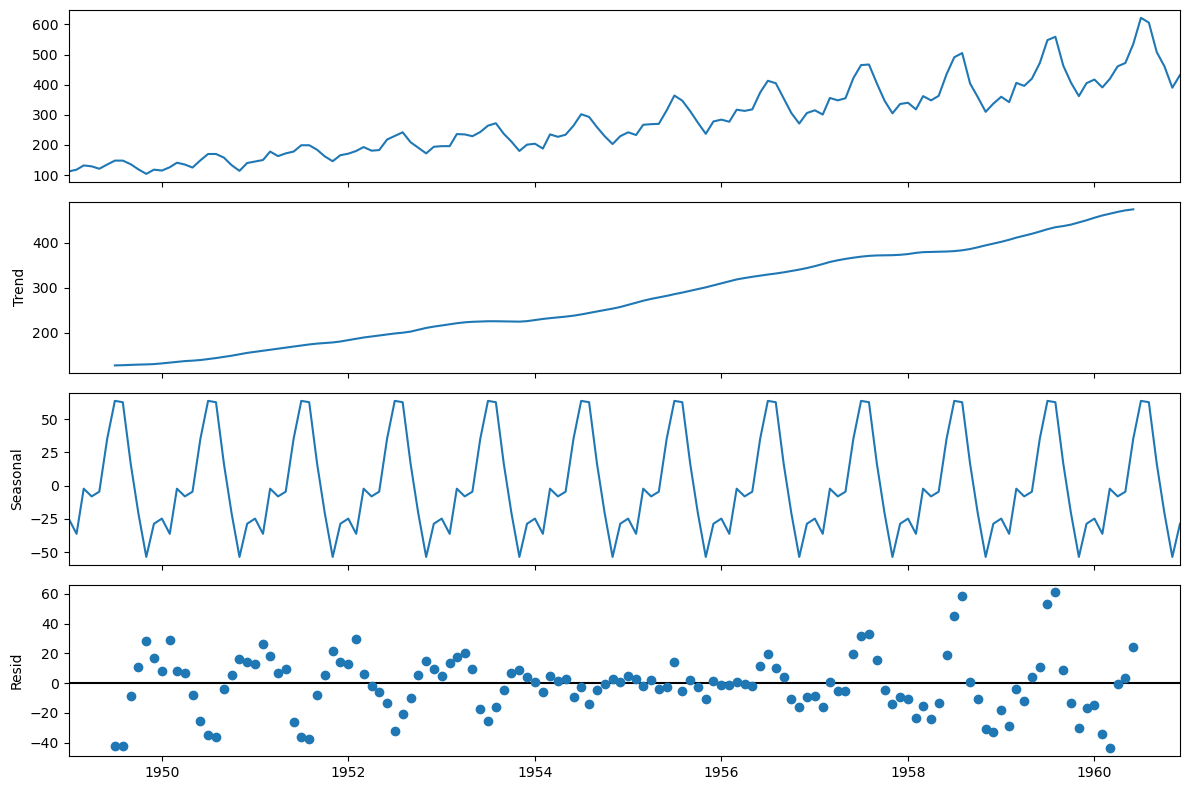

In [18]:
df1_add_decompose.plot()
plt.show()

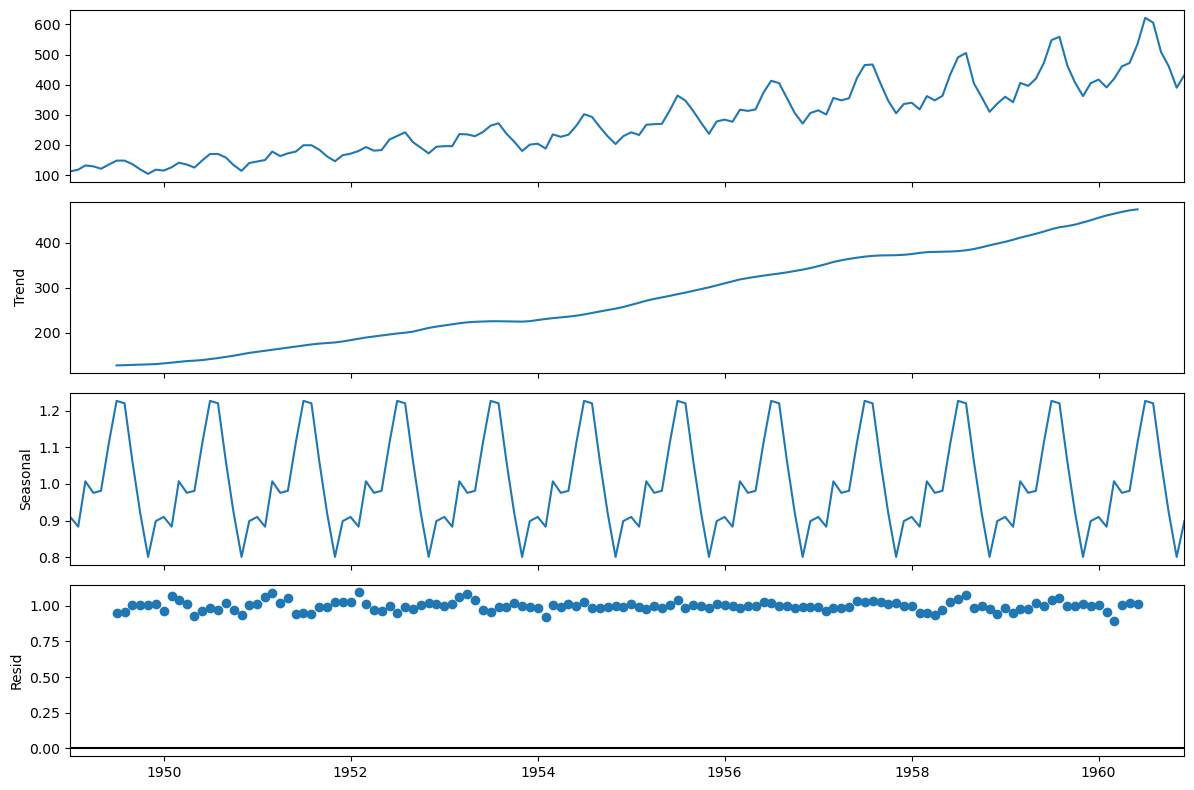

In [19]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [20]:
#Let's try to do log transformation
df1_log = df1.copy()

In [21]:
df1_log['Pax'] = np.log(df1)

In [22]:
df1_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

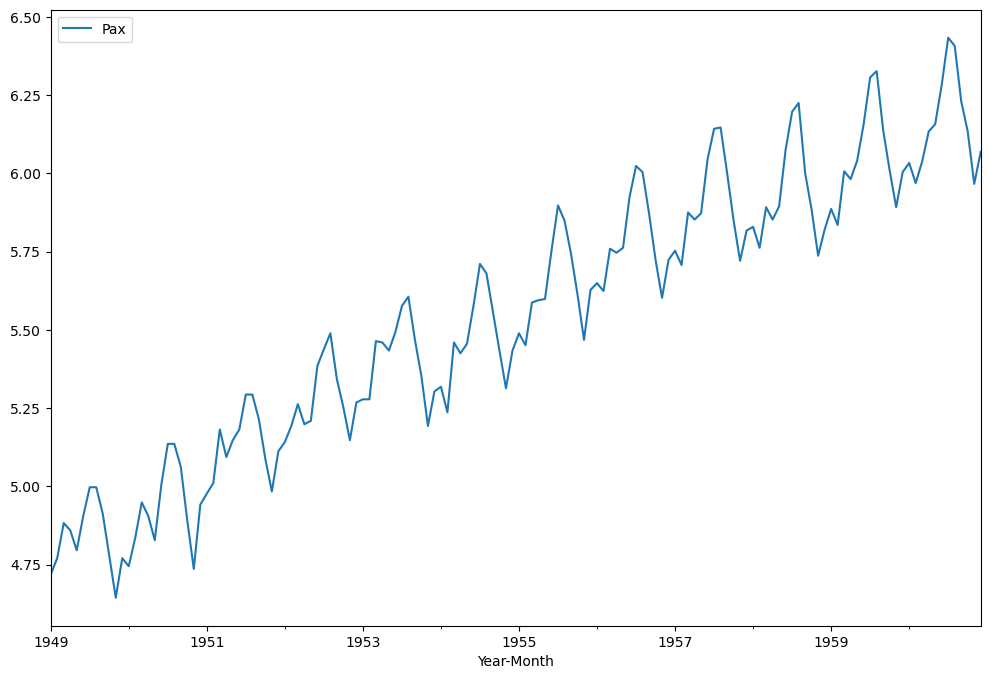

In [23]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

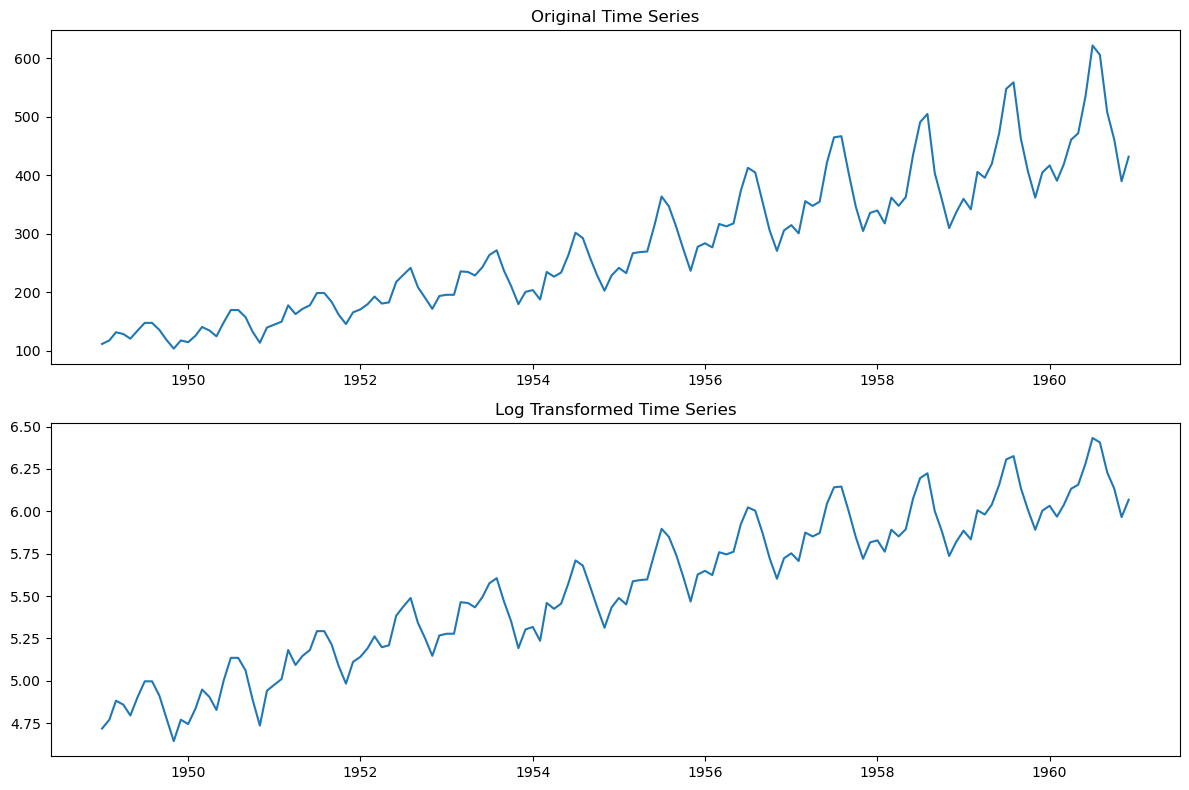

In [24]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()

## Example 2

In [25]:
#Read the data
df2 = pd.read_csv(LOCAL_DATA_PATH+'daily-total-female-births.csv', parse_dates = ['Date'], index_col = 'Date')

In [26]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


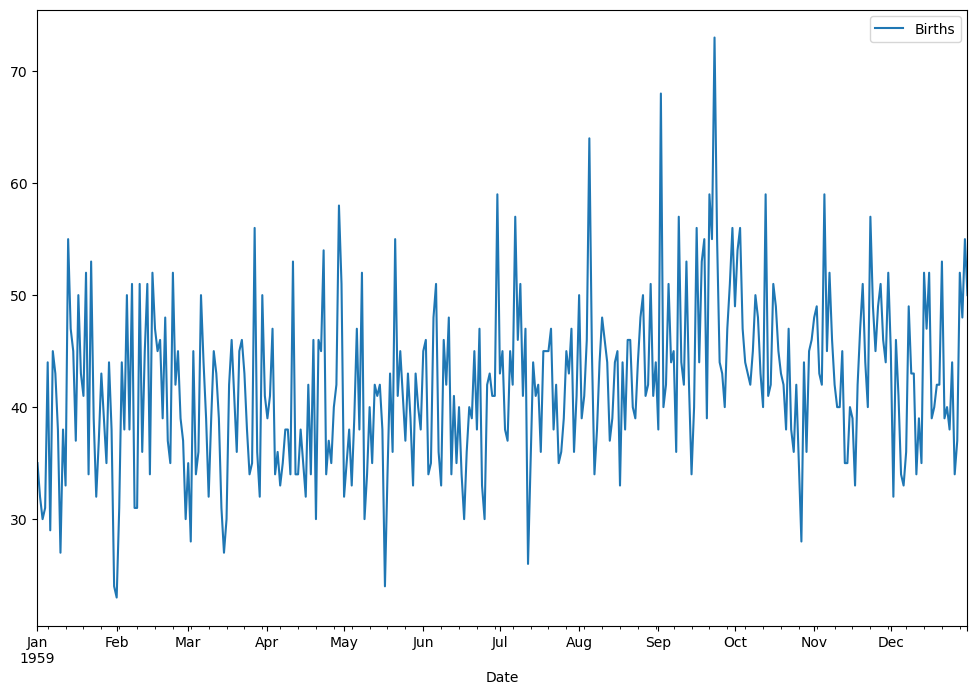

In [27]:
#Visualise the time series
df2.plot()
plt.show()

Doesn't show very clear trend and seasonality.

In [28]:
#Additive decomposition
df2_add_decompose = seasonal_decompose(df2, model = 'additive')

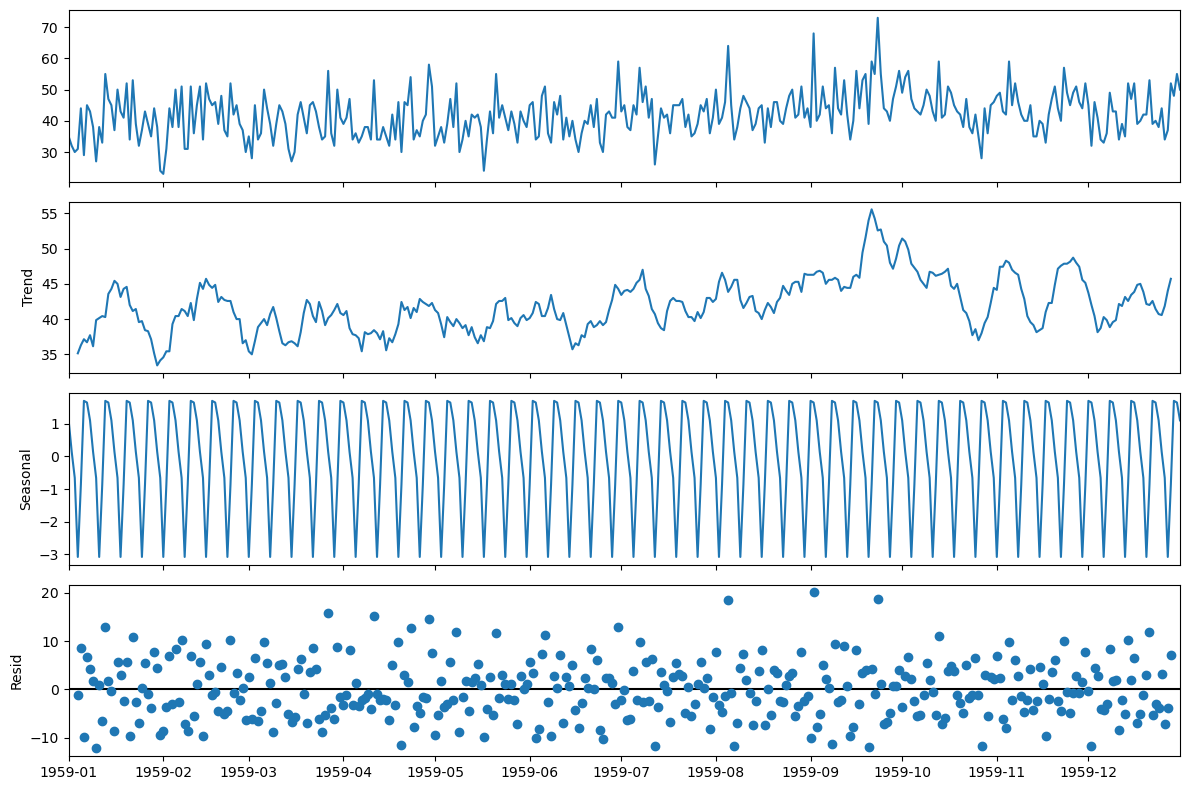

In [29]:
df2_add_decompose.plot()
plt.show()

In [30]:
#Let's inspect each component 
df2_add_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [31]:
df2_add_decompose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [32]:
df2_add_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [33]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
35.142857 -3.077608 -1.065249

31.0

In [34]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


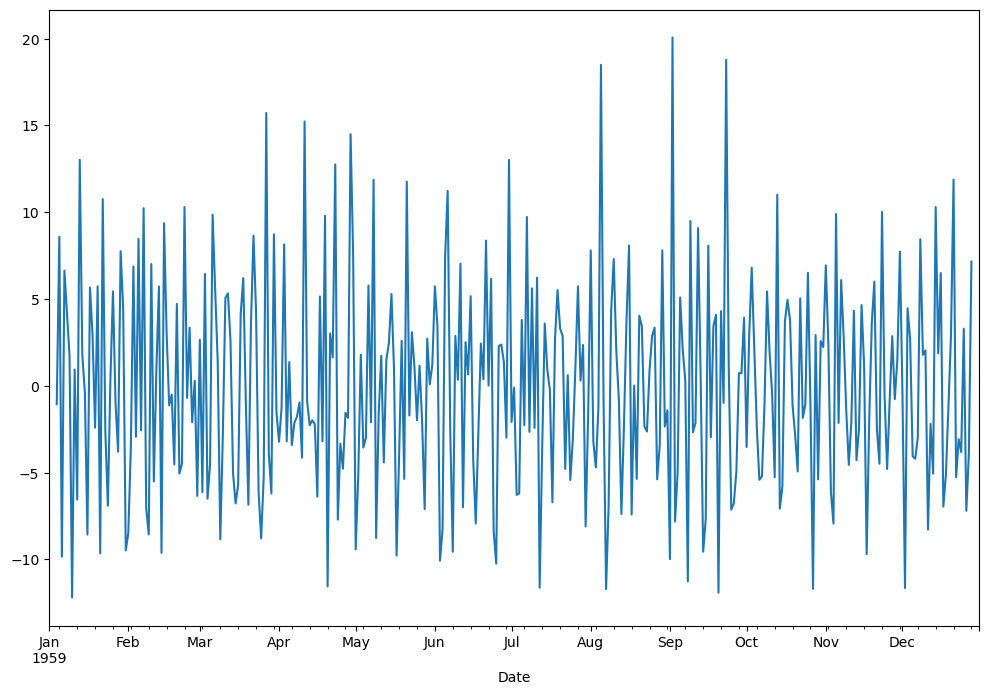

In [35]:
df2_add_decompose.resid.plot()
plt.show()

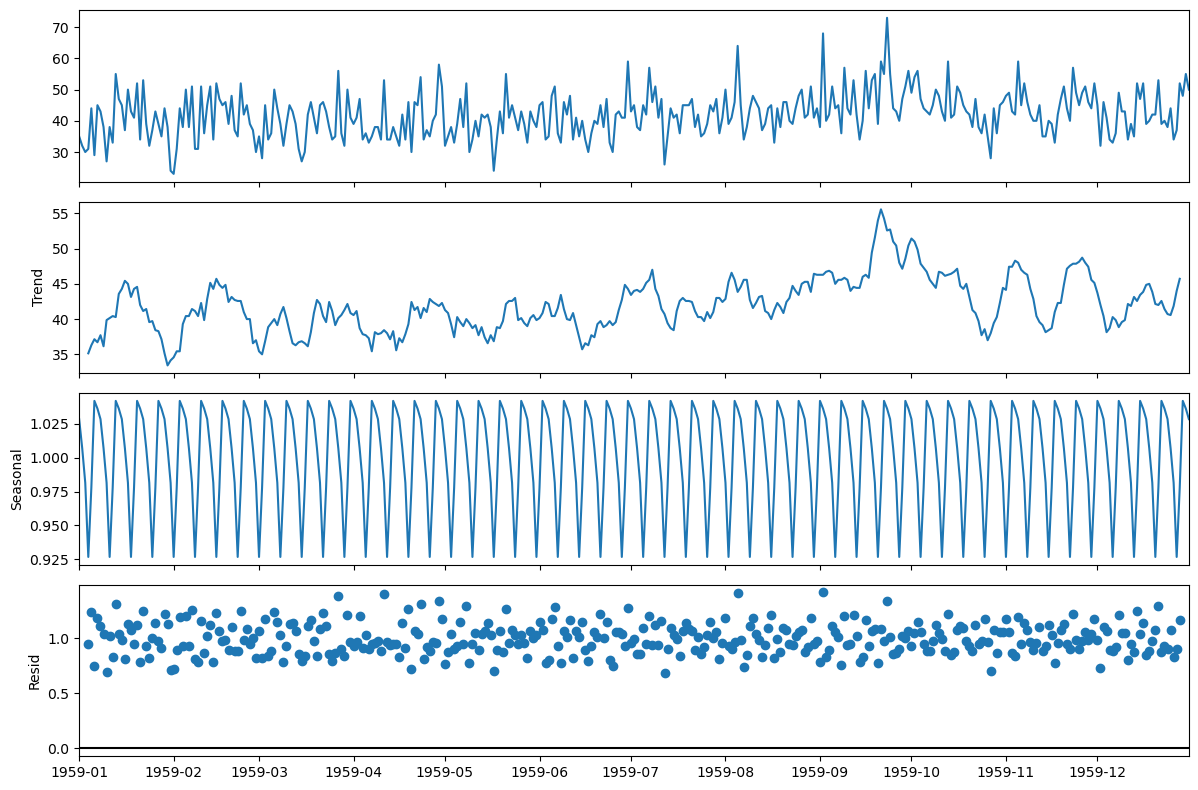

In [36]:
#Multiplicative decomposition
df2_mul_decompose = seasonal_decompose(df2, model = 'multiplicative')
df2_mul_decompose.plot()
plt.show()

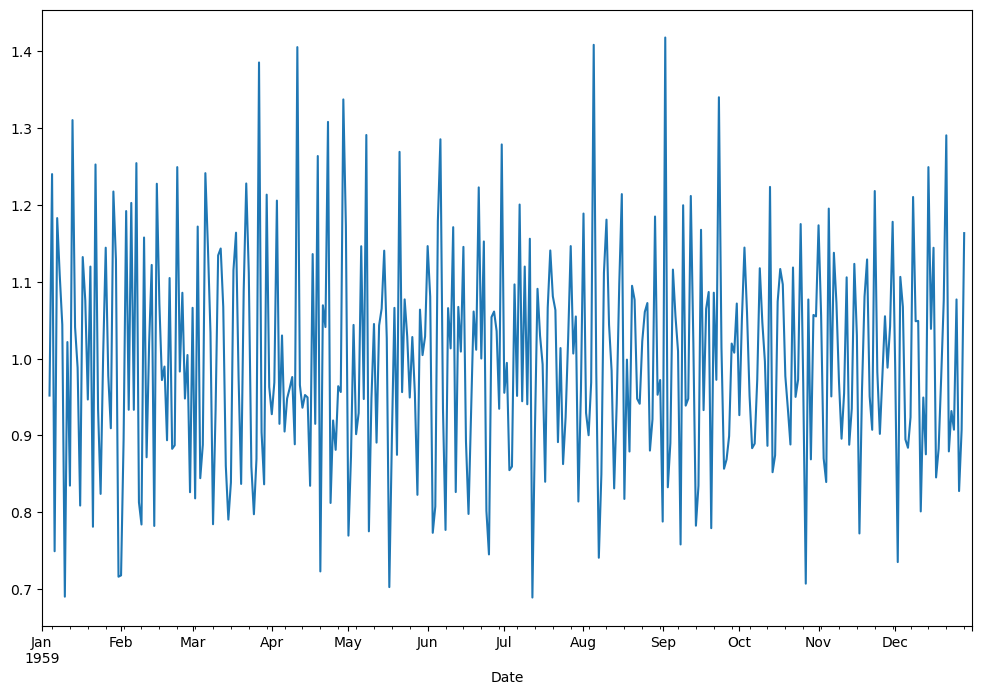

In [37]:
df2_mul_decompose.resid.plot()
plt.show()

In [38]:
#Let's inspect each component
df2_mul_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [39]:
df2_mul_decompose.seasonal

Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64

In [40]:
df2_mul_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [41]:
#Since this is a multiplicative model:
#Observed = Trend*Seasonality*Irregular
35.14*.93*.952

31.1115504

## Downsampling

In [43]:
#Let's change the monthly series to quarterly. This would require aggregation.
df1_q = df1.resample('QE').mean()

<Axes: xlabel='Year-Month'>

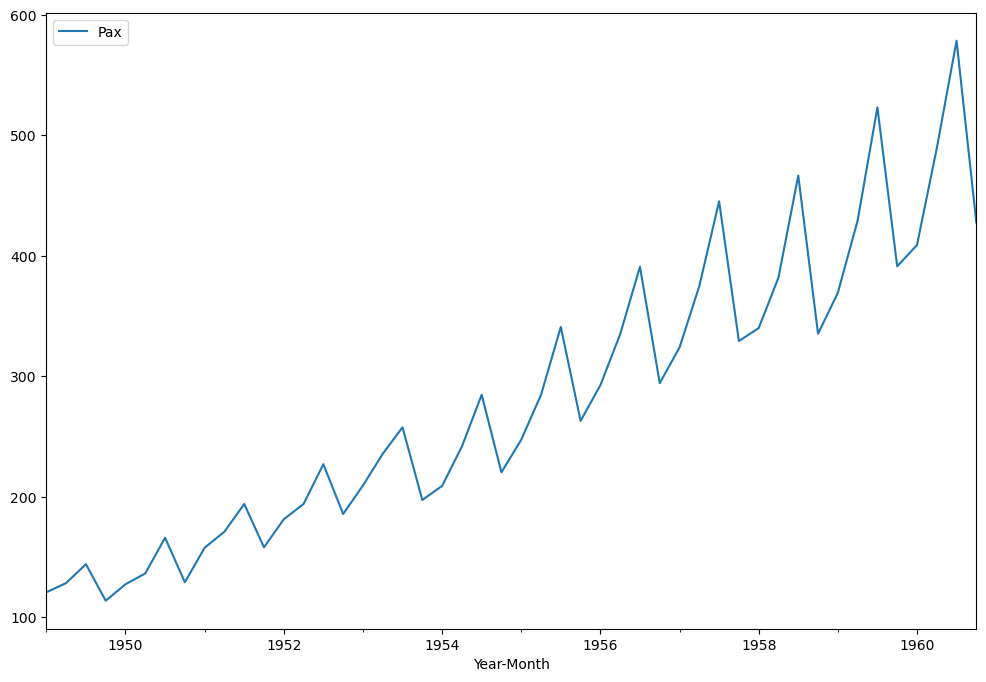

In [44]:
df1_q.plot()

## Upsampling 

In [45]:
#Let's change the monthly series to daily. 
df1_d = df1.resample('D').ffill()

In [46]:
df1_d.loc['1949-02']

,Pax
Year-Month,
1949-02-01,118
1949-02-02,118
1949-02-03,118
1949-02-04,118
1949-02-05,118
1949-02-06,118
1949-02-07,118
1949-02-08,118
1949-02-09,118


<Axes: xlabel='Year-Month'>

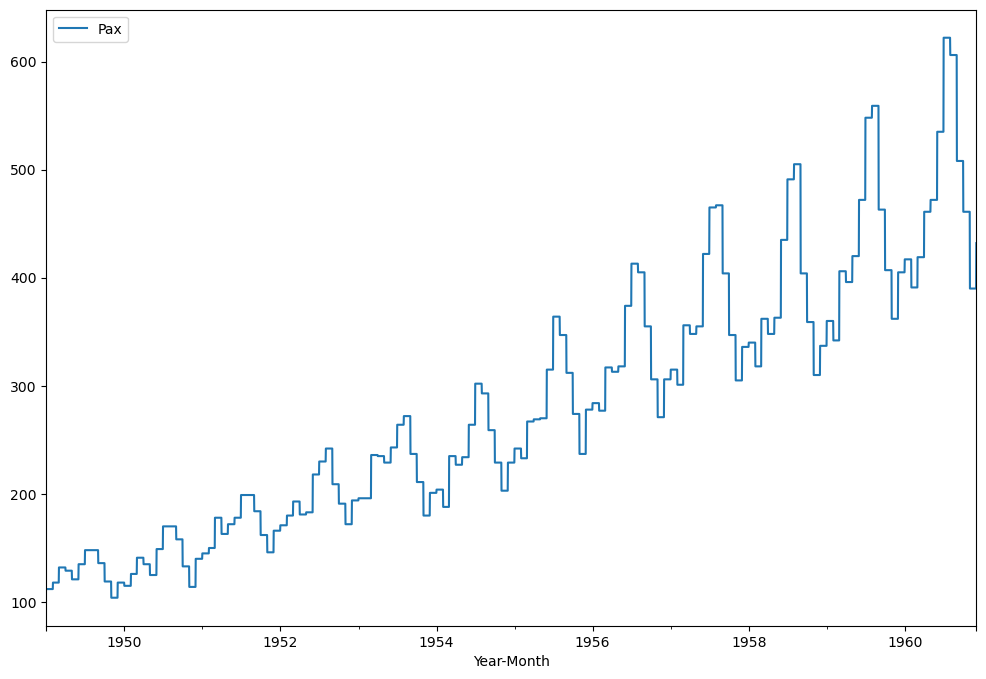

In [47]:
df1_d.plot()

In [49]:
#Let's change the monthly series to hourly. 
df1_h = df1.resample('h').interpolate()

In [50]:
df1_h

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


<Axes: xlabel='Year-Month'>

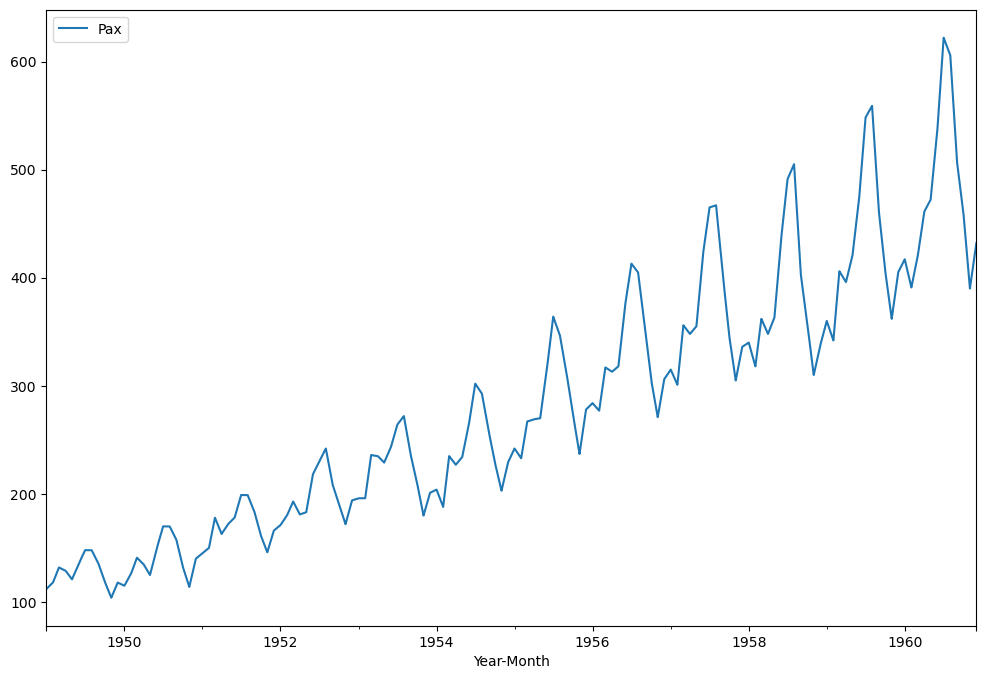

In [51]:
df1_h.plot()